In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
!python3 -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

## Load books

In [4]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('2021') if '.txt' in b.name]

In [5]:
all_books

[<DirEntry '2021.txt'>]

In [6]:
book = all_books[0]
# book = cryptojacking
book_text = open(book).read()
print(book_text)


[Note: In this two-part blog series, we expose a modern malware infrastructure and provide guidance for protecting against the wide range of threats it enables. Part 1 covers the evolution of the threat, how it spreads, and how it impacts organizations. Part 2 is a deep dive on the attacker behavior and will provide investigation guidance.] Combating and preventing today’s threats to enterprises require comprehensive protection focused on addressing the full scope and impact of attacks. Anything that can gain access to machines—even so-called commodity malware—can bring in more dangerous threats. We’ve seen this in banking Trojans serving as entry point for ransomware and hands-on-keyboard attacks. LemonDuck, an actively updated and robust malware that’s primarily known for its botnet and cryptocurrency mining objectives, followed the same trajectory when it adopted more sophisticated behavior and escalated its operations. Today, beyond using resources for its traditional bot and mini

In [7]:
all_entities = NER(book_text)

In [8]:
entity_types_to_remove = ["CARDINAL", "TIME", "DATE", "ORDINAL", "QUANTITY", "PERCENT", "MONEY"]
filtered_entities =[ent.text for ent in all_entities.ents if ent.label_ not in entity_types_to_remove]
print(filtered_entities)

['Trojans', 'LemonDuck', 'Linux', 'Windows', 'USB', 'COVID-19', 'LemonDuck targeted', 'China', 'IoT', 'LemonDuck', 'the United States', 'Russia', 'China', 'Germany', 'the United Kingdom', 'India', 'Korea', 'Canada', 'France', 'Vietnam', 'LemonDuck', 'LemonDuck', 'C2s', 'Epik Holdings', 'LemonDuck', 'LemonDuck', 'LemonDuck', 'LemonCat', 'LemonDuck', 'PowerShell', 'PCASTLE', 'EternalBlue SMB', 'LemondDuck', 'Lemon_Duck', 'PowerShell', 'PowerShell', 'SIEX', 'Microsoft', 'LemonDuck', 'C2', 'Lemon_Duck', 'netcatkit[.]com)—emerged', 'Microsoft Exchange Server', 'Ramnit', 'Sample Duck', 'Sample Cat', 'cdnimages[.]xyz', 'zz3r0[.]com', 'amynx[.]com ackng[.]com hwqloan[.]com', 'js88[.]ag zer9g[.]com b69kq[.]com', 'LemonDuck', 'LemonDuck', 'Windows', 'Linux', 'SMB', 'Exchange', 'SQL', 'Hadoop', 'REDIS', 'CVE-2017-0144', 'EternalBlue', 'CVE-2017-8464', 'SMBGhost', 'CVE-2021-26855', 'ProxyLogon', 'CVE-2021-26857', 'ProxyLogon', 'CVE-2021-26858', 'ProxyLogon', 'CVE-2021-27065', 'ProxyLogon', 'Outloo

In [9]:
# Visualize identified entities
displacy.render(all_entities[0:2000], style="ent", jupyter=True)

## Get named entity list per sentence

In [10]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in all_entities.sents:
    entity_list = [ent.text for ent in sent.ents if ent.label_ not in entity_types_to_remove]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)
print(sent_entity_df.head(10))

                                            sentence          entities
0  (\n, [, Note, :, In, this, two, -, part, blog,...                []
1  (Part, 1, covers, the, evolution, of, the, thr...                []
2  (Part, 2, is, a, deep, dive, on, the, attacker...                []
3  (Combating, and, preventing, today, ’s, threat...                []
4  (Anything, that, can, gain, access, to, machin...                []
5  (We, ’ve, seen, this, in, banking, Trojans, se...         [Trojans]
6  (LemonDuck, ,, an, actively, updated, and, rob...                []
7  (Today, ,, beyond, using, resources, for, its,...                []
8  (LemonDuck, ’s, threat, to, enterprises, is, a...       [LemonDuck]
9  (It, ’s, one, of, a, few, documented, bot, mal...  [Linux, Windows]


In [11]:
sent_entity_df

,sentence,entities
0,"(\n, [, Note, :, In, this, two, -, part, blog,...",[]
1,"(Part, 1, covers, the, evolution, of, the, thr...",[]
2,"(Part, 2, is, a, deep, dive, on, the, attacker...",[]
3,"(Combating, and, preventing, today, ’s, threat...",[]
4,"(Anything, that, can, gain, access, to, machin...",[]
...,...,...
279,"(Additionally, ,, if, your, computer, has, bee...",[]
280,"(How, can, I, protect, against, cryptojacking,...",[]
281,"(The, most, important, thing, you, can, do, is...",[]
282,"(If, your, computer, is, suddenly, running, sl...",[CPU]


In [12]:
# Filter out sentences that don't have any entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities
5,"(We, ’ve, seen, this, in, banking, Trojans, se...",[Trojans]
8,"(LemonDuck, ’s, threat, to, enterprises, is, a...",[LemonDuck]
9,"(It, ’s, one, of, a, few, documented, bot, mal...","[Linux, Windows]"
10,"(It, uses, a, wide, range, of, spreading, mech...",[USB]
11,"(For, example, ,, in, 2020, ,, it, was, observ...",[COVID-19]
16,"(In, the, early, years, ,, LemonDuck, targeted...","[LemonDuck targeted, China, IoT]"
17,"(Today, ,, LemonDuck, impacts, a, very, large,...","[LemonDuck, the United States, Russia, China, ..."
19,"(Global, distribution, of, LemonDuck, botnet, ...","[LemonDuck, LemonDuck]"
21,"(Despite, all, these, upgrades, ,, however, ,,...",[C2s]
22,"(This, is, likely, due, to, its, use, of, bull...","[Epik Holdings, LemonDuck, LemonDuck]"


In [13]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities
5,"(We, ’ve, seen, this, in, banking, Trojans, se...",[Trojans]
8,"(LemonDuck, ’s, threat, to, enterprises, is, a...",[LemonDuck]
9,"(It, ’s, one, of, a, few, documented, bot, mal...","[Linux, Windows]"
10,"(It, uses, a, wide, range, of, spreading, mech...",[USB]
11,"(For, example, ,, in, 2020, ,, it, was, observ...",[COVID-19]
...,...,...
274,"(Unsplash, \n, Monero, botnet, steals, AWS, lo...","[Monero, AWS, Hackers, Amazon Web Services, Ca..."
275,"(AWS, is, the, e, -, commerce, giant, ’s, clou...",[AWS]
276,"(The, firm, said, the, malware, operation, is,...",[Amazon]
278,"(The, bot, has, itself, been, active, ..., \n\...","[Coins, Shaurya Malwa\nAug 18, 2020\nForcing]"


## Create relationships

In [14]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [15]:
relationship_df = pd.DataFrame(relationships)

In [16]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Trojans,LemonDuck
1,Trojans,LemonDuck
2,LemonDuck,Linux
3,Linux,Windows
4,Trojans,LemonDuck
5,LemonDuck,Linux
6,Linux,Windows
7,Windows,USB
8,LemonDuck,Linux
9,Linux,Windows


In [17]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,LemonDuck,Trojans
1,LemonDuck,Trojans
2,LemonDuck,Linux
3,Linux,Windows
4,LemonDuck,Trojans
5,LemonDuck,Linux
6,Linux,Windows
7,USB,Windows
8,LemonDuck,Linux
9,Linux,Windows


In [18]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [19]:
relationship_df.head(10)

,source,target,value
0,LemonDuck,Trojans,3
1,LemonDuck,Linux,5
2,Linux,Windows,18
3,USB,Windows,5
4,COVID-19,USB,5
5,COVID-19,LemonDuck targeted,1
6,China,LemonDuck targeted,6
7,China,IoT,6
8,IoT,LemonDuck,5
9,LemonDuck,the United States,6


## Graph analysis and visualization

In [20]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

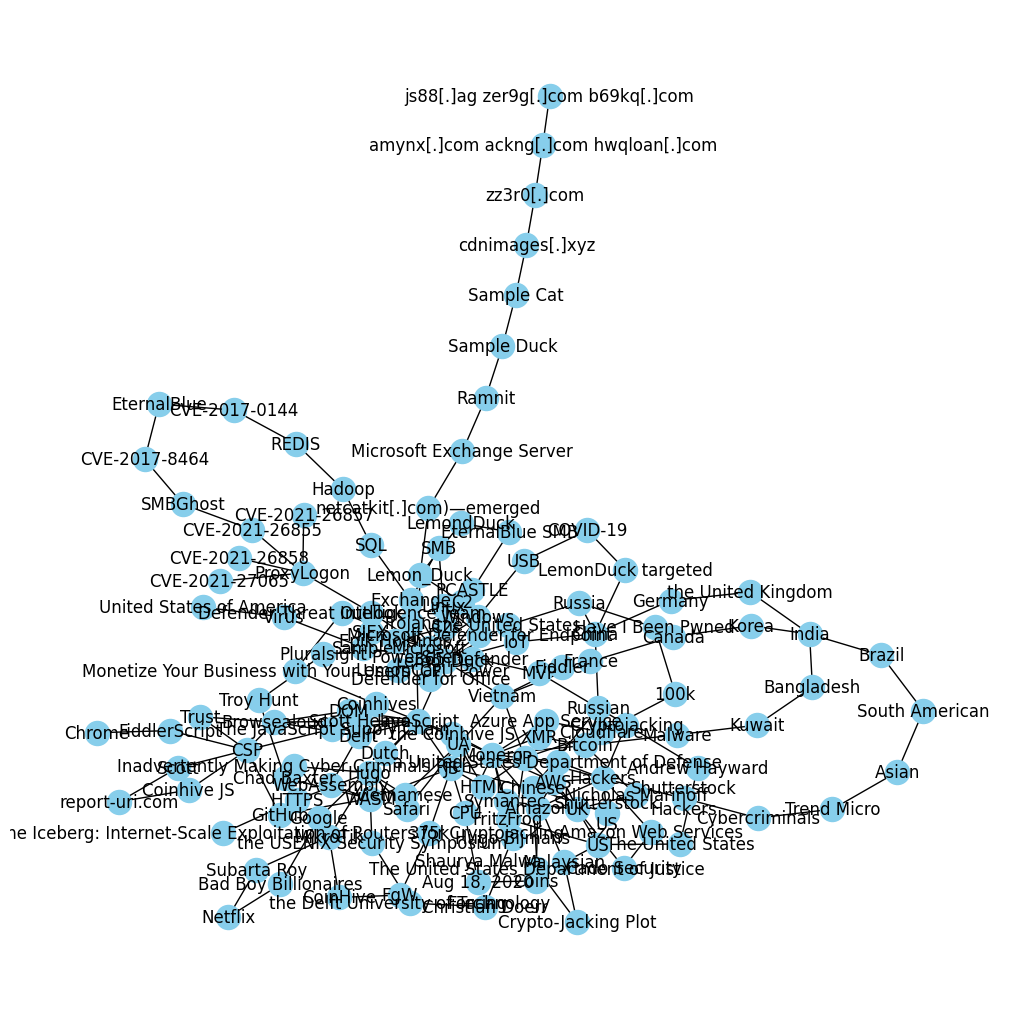

In [21]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [22]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html


### The most important characters in The Witcher

In [23]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'LemonDuck': 0.13103448275862067,
 'Trojans': 0.006896551724137931,
 'Linux': 0.027586206896551724,
 'Windows': 0.027586206896551724,
 'USB': 0.013793103448275862,
 'COVID-19': 0.013793103448275862,
 'LemonDuck targeted': 0.013793103448275862,
 'China': 0.034482758620689655,
 'IoT': 0.013793103448275862,
 'the United States': 0.013793103448275862,
 'Russia': 0.020689655172413793,
 'Germany': 0.013793103448275862,
 'the United Kingdom': 0.013793103448275862,
 'India': 0.027586206896551724,
 'Korea': 0.013793103448275862,
 'Canada': 0.013793103448275862,
 'France': 0.013793103448275862,
 'Vietnam': 0.034482758620689655,
 'C2s': 0.013793103448275862,
 'Epik Holdings': 0.013793103448275862,
 'LemonCat': 0.013793103448275862,
 'PowerShell': 0.041379310344827586,
 'PCASTLE': 0.013793103448275862,
 'EternalBlue SMB': 0.013793103448275862,
 'LemondDuck': 0.013793103448275862,
 'Lemon_Duck': 0.027586206896551724,
 'SIEX': 0.013793103448275862,
 'Microsoft': 0.06206896551724138,
 'C2': 0.013793

<Axes: >

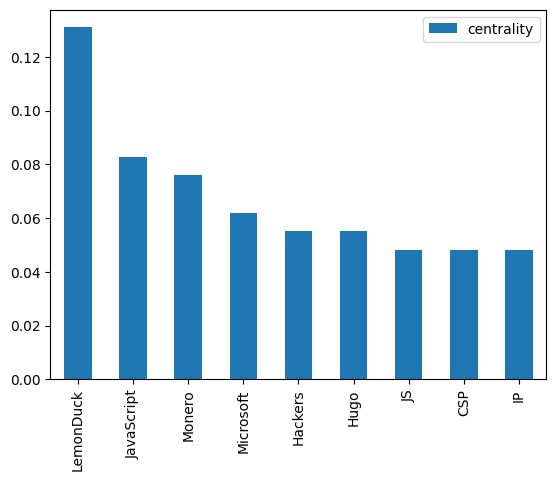

In [24]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

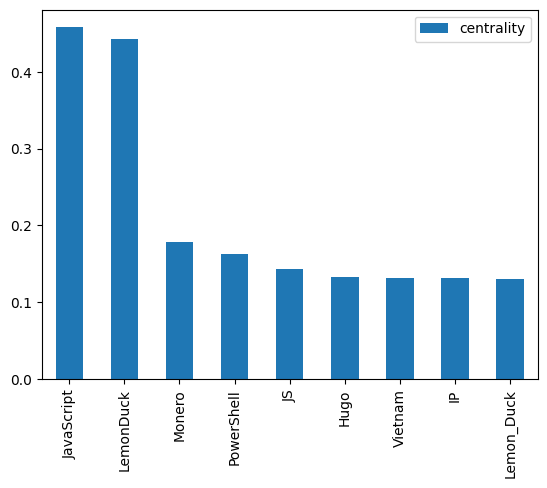

In [25]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

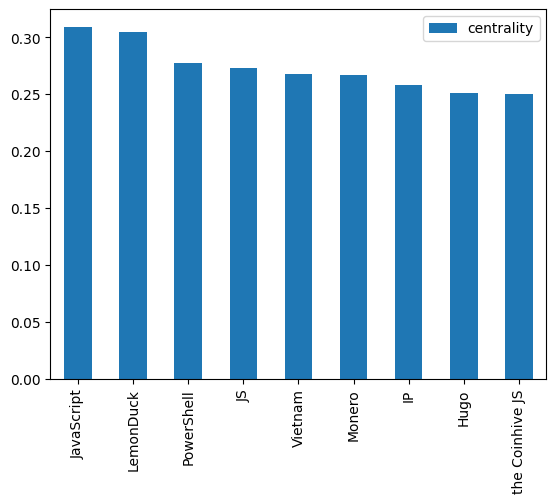

In [26]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [27]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [28]:
!pip install python-louvain

### Community detection

In [29]:
from community import community_louvain

In [30]:
communities = community_louvain.best_partition(G)

In [31]:
communities

{'LemonDuck': 0,
 'Trojans': 0,
 'Linux': 0,
 'Windows': 0,
 'USB': 1,
 'COVID-19': 1,
 'LemonDuck targeted': 1,
 'China': 1,
 'IoT': 1,
 'the United States': 1,
 'Russia': 1,
 'Germany': 1,
 'the United Kingdom': 1,
 'India': 3,
 'Korea': 3,
 'Canada': 3,
 'France': 3,
 'Vietnam': 4,
 'C2s': 0,
 'Epik Holdings': 0,
 'LemonCat': 0,
 'PowerShell': 0,
 'PCASTLE': 0,
 'EternalBlue SMB': 0,
 'LemondDuck': 0,
 'Lemon_Duck': 0,
 'SIEX': 0,
 'Microsoft': 0,
 'C2': 0,
 'netcatkit[.]com)—emerged': 5,
 'Microsoft Exchange Server': 5,
 'Ramnit': 5,
 'Sample Duck': 5,
 'Sample Cat': 5,
 'cdnimages[.]xyz': 5,
 'zz3r0[.]com': 5,
 'amynx[.]com ackng[.]com hwqloan[.]com': 5,
 'js88[.]ag zer9g[.]com b69kq[.]com': 5,
 'SMB': 0,
 'Exchange': 0,
 'SQL': 7,
 'Hadoop': 7,
 'REDIS': 7,
 'CVE-2017-0144': 7,
 'EternalBlue': 7,
 'CVE-2017-8464': 7,
 'SMBGhost': 7,
 'CVE-2021-26855': 7,
 'ProxyLogon': 7,
 'CVE-2021-26857': 7,
 'CVE-2021-26858': 7,
 'CVE-2021-27065': 7,
 'Outlook': 7,
 'Sample': 0,
 'Virus': 0,
 

In [32]:
nx.set_node_attributes(G, communities, 'group')

In [33]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_2021.html")

witcher_2021.html


### Evolution of characters' importance

In [34]:
from lib.utils.functions import *

In [35]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('2021') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [36]:
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G)


AttributeError: 'DataFrame' object has no attribute 'character_entities'

In [ ]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()